# Models Study
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö

## Algorithm implementation for solving system of ODEs

- [Runge Kutta 4th Order - System of ODEs version](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/ode_system/odes_runge_kutta_fourth_order.py)


In [5]:
# imports

# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

# imports
from math import exp
from ntsa.algorithms.ode_system import ODESRungeKuttaFourthOrder
from ntsa.tools import DataViz
data_viz = DataViz()

# setup plot configs
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

## Home Heating

Consider a typical home with attic, basement and insulated main floor.
It is usual to surround the main living area with insulation, but the attic
area has walls and ceiling without insulation. The walls and floor in the
basement are insulated by earth. The basement ceiling is insulated by
air space in the joists, a layer of flooring on the main floor and a layer
of drywall in the basement. We will analyze the changing temperatures
in the three levels using Newton’s cooling law and the variables

- y0(t) = Temperature in the attic,
- y1(t) = Temperature in the main living area,
- y2(t) = Temperature in the basement,
- t = Time in hours.

**Initial data**. Assume it is winter time and the outside temperature
in constantly 35◦F during the day. Also assumed is a basement earth
temperature of 45◦F. Initially, the heat is off for several days. The initial
values at noon (t = 0) are then y2(0) = 45, y1(0) = y0(0) = 35.

**Portable heater**. A small electric heater is turned on at noon, with
thermostat set for 100◦F. When the heater is running, it provides a 20◦F
rise per hour, therefore it takes some time to reach 100◦F (probably
never!).

Temperature rate is given by the EOD System:

- y0' = 1/4(y1 - y0) + 1/2(35 - y0)
- y1' = 1/2(y2 - y1) + 1/4(35 - y1) + 1/4(y0 - y1) + 20
- y2' = 1/2(45 - y2) + 1/2(y1 - y2)

In [6]:
initial_t = 0
initial_ys = [35, 35, 45]
dydt_equations = [
    lambda t, y0, y1, y2: 1/4 * (y1 - y0) + 1/2 * (35 - y0), # y0'
    lambda t, y0, y1, y2: 1/2 * (y2 - y1) + 1/4 * (35 - y1) + 1/4 * (y0 - y1) + 20, # y1'
    lambda t, y0, y1, y2: 1/2 * (45 - y2) + 1/2 * (y1 - y2), # y2'
]
h = 1
n = 18  # 18h

In [7]:
solver = ODESRungeKuttaFourthOrder(h, dydt_equations, initial_t, initial_ys)
data_points = solver.calculate_y_series(n)

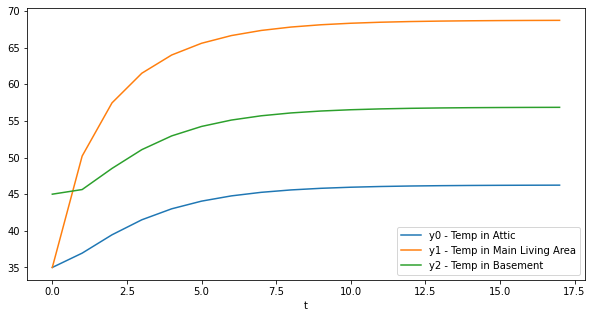

In [8]:
# plot numerical solution over time (hours)
data_viz.plot_data([{"t": point["t"], "y0": point["y0"]} for point in data_points], y="y0", label="y0 - Temp in Attic")
data_viz.plot_data([{"t": point["t"], "y1": point["y1"]} for point in data_points], y="y1", label="y1 - Temp in Main Living Area")
data_viz.plot_data([{"t": point["t"], "y2": point["y2"]} for point in data_points], y="y2", label="y2 - Temp in Basement")

### Conclusions
- We run the model for 18h to see the behavior of the temperature between the rooms of the house.
- Around hour 10 we can see that the temperatures come into equilibrium
- In the end, we can see that the heater is capable of maintaining the main living area is a good temperature for humans. The basement remains a little bit chilly and the attic is still cold.

## Forecasting Prices

A cosmetics manufacturer has a marketing policy based upon the price
y0(t) of its salon shampoo. The marketing strategy for the shampoo is to set the
price x(t) dynamically to reflect demand for theproduct. A low inventory is desirable,
to reduce the overall cost of the product.

The differential equations for the price y0(t) and inventory level y1(t) are:

- `y0'(t) = k*y1(t) - k*y1_0`
- `y1'(t) = (13/4)*y0(t) - 6*k*y1(t) + 6*k*y1_0 - 11`

Using `k = 1`, `y0(0) = 10`, `y1(0) = 7`. `y1_0` represents the desired inventory level = 50.

In [23]:
initial_t = 0
initial_values = [10, 7] # y0(0) = 10, y1(0) = 7
k = 1
y1_0 = 50

equations = [
    lambda t, y0, y1: k * y1 - k * y1_0, # y0'
    lambda t, y0, y1: 13/4 * y0 - 6 * k * y1 + 6 *k * y1_0 - 11 # y1'
]

In [36]:
h = 0.01
n = 100

solver = ODESRungeKuttaFourthOrder(h, equations, initial_t, initial_values)
data_points = solver.calculate_y_series(n)

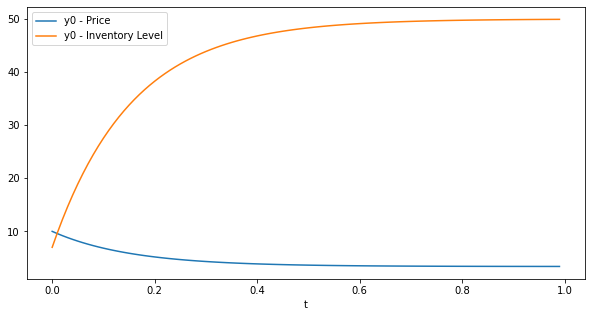

In [37]:
# plot numerical solution over time (hours)
data_viz.plot_data([{"t": point["t"], "y0": point["y0"]} for point in data_points], y="y0", label="y0 - Price")
data_viz.plot_data([{"t": point["t"], "y1": point["y1"]} for point in data_points], y="y1", label="y0 - Inventory Level")

## Conclusion:

- We can see that, as desired, inventory level stabilizes around 50
- The price change rate decreases until reaches around $3.39
- The gotten numerical solution values match the analytical solution of the system.